### Stock market prediction 

#### The imports  

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from pandas_profiling import ProfileReport
from subprocess import check_output
import seaborn as sns
import warnings
from pandas.plotting import lag_plot      


#### Try to plotting for any random company say TCS

In [2]:
#tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2019-10-01'
end_date = '2020-4-12'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
#panel_data = data.DataReader('INFY', 'yahoo-dividends', start_date, end_date)

panel_data = data.DataReader('TCS', 'yahoo', start_date, end_date)

#TCS stands for Tata Consultency Services 

In [270]:
panel_data.shape

(134, 6)

In [3]:

#this the the co-relational between all columns 
panel_data.corr()


,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.985261,0.989653,0.986147,-0.088196,0.985382
Low,0.985261,1.000000,0.986734,0.992282,-0.201530,0.990710
Open,0.989653,0.986734,1.000000,0.974401,-0.106333,0.972892
Close,0.986147,0.992282,0.974401,1.000000,-0.184265,0.998490
Volume,-0.088196,-0.201530,-0.106333,-0.184265,1.000000,-0.182226
Adj Close,0.985382,0.990710,0.972892,0.998490,-0.182226,1.000000


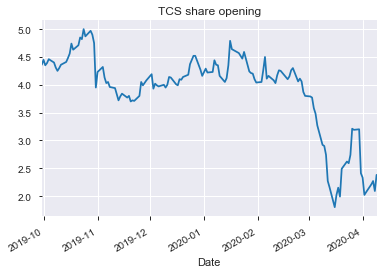

In [4]:
panel_data.Open.plot()
plt.title("TCS share opening")
plt.show()

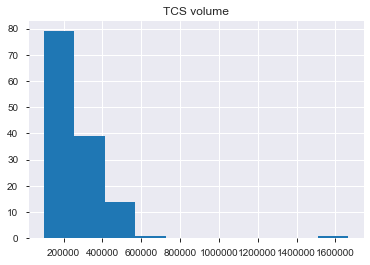

In [5]:
panel_data.Volume.hist()
plt.title("TCS volume")
plt.show()

#how histogram work?

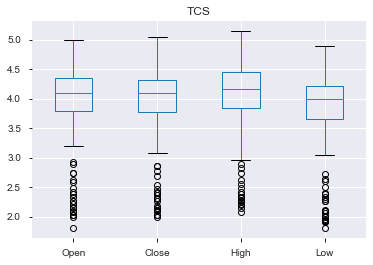

In [6]:
panel_data.boxplot(column=['Open', 'Close', 'High','Low'])
plt.title("TCS")
plt.show()

#box-whisker plot


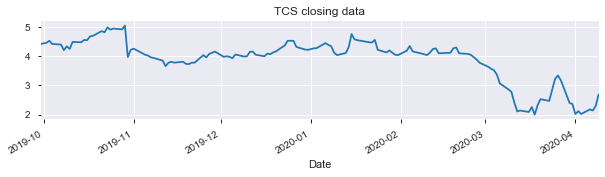

In [266]:
panel_data.Close.plot()
plt.title("TCS closing data")
plt.show()

Text(0.5, 1.0, 'TCS Cumulative Returns')

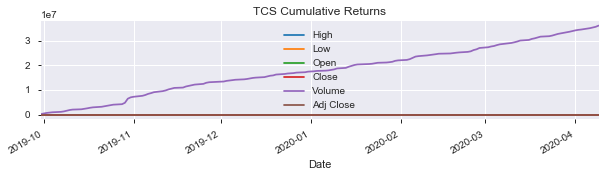

In [269]:
dr = panel_data.cumsum()
dr.plot()
plt.title('TCS Cumulative Returns')

#Cumulative Sum

Text(0.5, 1.0, 'TCS Autocorrelation plot')

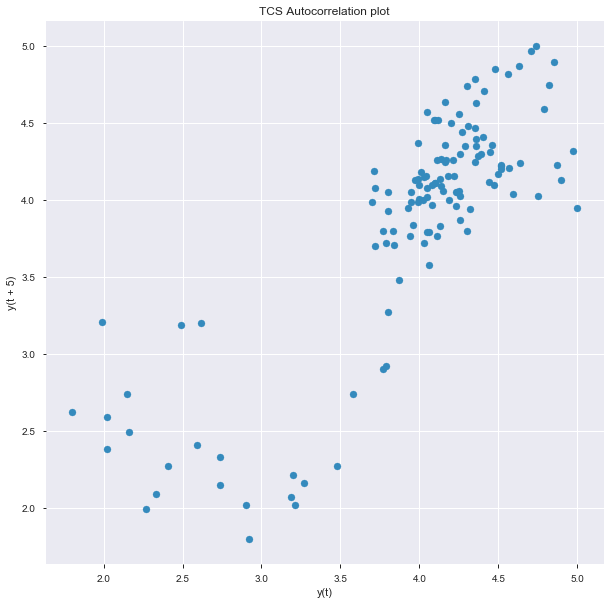

In [268]:
plt.figure(figsize=(10,10))
lag_plot(panel_data['Open'], lag=5)
plt.title('TCS Autocorrelation plot')

#scatter plot

In [10]:
profile = ProfileReport(panel_data, title='Pandas Profiling Report')

In [11]:
profile

#### Furthermore i have an API to fetch data for as tickers i want so do some further statistical modelling 

#### I also have a excel data which includes tickers for all kindof company with all types of bussiness domains 

In [12]:
#Multi Accounts data puller 

In [13]:
df_index = pd.read_csv(r'C:\Users\anike\Downloads\personal_work\Stock_market_pred\index_dataset.csv', encoding = 'ISO-8859-1')

In [277]:
df_index.head()

,Ticker,Name,Exchange,Category_Name,Country
0,OEDV,"Osage Exploration and Development, Inc.",PNK,NaN,USA
1,AAPL,Apple Inc.,NMS,Electronic Equipment,USA
2,BAC,Bank of America Corporation,NYQ,Money Center Banks,USA
3,AMZN,"Amazon.com, Inc.",NMS,Catalog & Mail Order Houses,USA
4,T,AT&T Inc.,NYQ,Telecom Services - Domestic,USA


In [15]:
ProfileReport(df_index, title='Pandas Profiling Report for Tickers')

In [16]:
# Filtering out tickers which belongs to india only 

In [17]:
df_index_india = df_index[df_index['Country']=='India']

In [18]:
df_index_india.columns

Index(['Ticker', 'Name', 'Exchange', 'Category_Name', 'Country'], dtype='object')

In [19]:
df_index_india.Category_Name.value_counts()

Textile Industrial                    93
General Contractors                   68
Auto Parts                            64
Diversified Machinery                 63
Steel & Iron                          57
General Building Materials            53
Information Technology Services       47
Money Center Banks                    37
Specialty Chemicals                   36
Real Estate Development               33
Chemicals - Major Diversified         33
Drug Manufacturers - Major            31
Drugs - Generic                       30
Investment Brokerage - National       30
Agricultural Chemicals                28
Food - Major Diversified              27
Rubber & Plastics                     26
Textile - Apparel Clothing            25
Confectioners                         24
Credit Services                       23
Asset Management                      22
Farm Products                         19
Metal Fabrication                     19
Electric Utilities                    19
Industrial Metal

#### By plotting pie chart we can figure out which domain category does most of the companies belongs

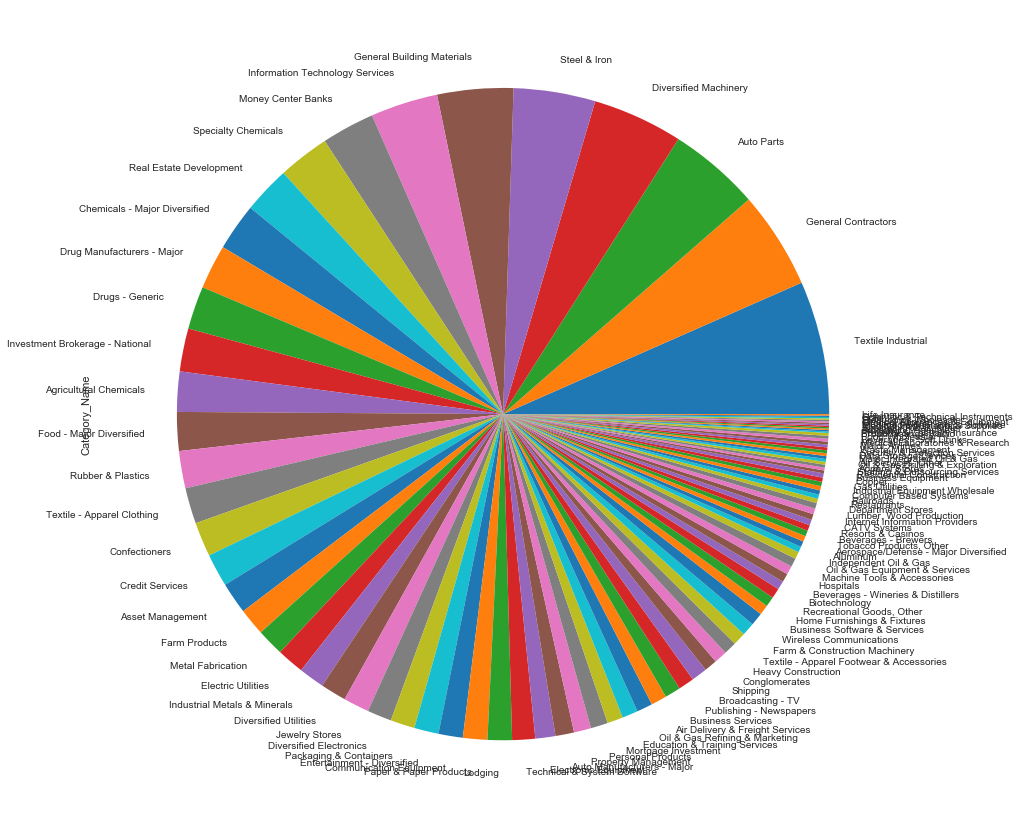

In [20]:
df_index_india.Category_Name.value_counts().plot.pie(figsize=(25, 15))

In [21]:
#After watching this pie lets filter out any field from the category and find best companies based on this past 4 months performance 

In [22]:
df_index_india_bank = df_index_india[df_index_india.Category_Name=='Money Center Banks']

In [23]:
df_index_india_bank.head(10)
#Lets consider bank sector

,Ticker,Name,Exchange,Category_Name,Country
2897,SBIN.NS,State Bank of India,NSI,Money Center Banks,India
3324,MAHABANK.NS,Bank of Maharashtra,NSI,Money Center Banks,India
3693,IDBI.NS,IDBI Bank Limited,NSI,Money Center Banks,India
12913,J&KBANK.NS,The Jammu and Kashmir Bank Limited,NSI,Money Center Banks,India
14045,KOTAKBANK.NS,Kotak Mahindra Bank Limited,NSI,Money Center Banks,India
15888,YESBANK.NS,Yes Bank Limited,NSI,Money Center Banks,India
15988,SOUTHBANK.NS,The South Indian Bank Limited,NSI,Money Center Banks,India
17551,UNIONBANK.NS,Union Bank of India,NSI,Money Center Banks,India
18074,BANKINDIA.NS,Bank of India Limited,NSI,Money Center Banks,India
21518,CUB.NS,City Union Bank Limited,NSI,Money Center Banks,India


In [24]:
#here most of the ticker data belongs to Bombay Exchange stock

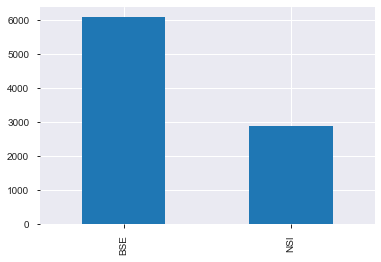

In [25]:
df_index_india.Exchange.value_counts().plot.bar()

In [26]:
df_index_india_bank.shape

(37, 5)

#### total 37 tickers are present in bank data , lets slice the first 10 banks data and find the top 2 bank which are doing good.

#### Same like this we can also find the tickers which belongs to hot indexes like nifty 50 or nifty banks 

In [27]:
test = df_index_india_bank.Ticker.to_list()

In [28]:
test = test[:10]

In [29]:
test

['SBIN.NS',
 'MAHABANK.NS',
 'IDBI.NS',
 'J&KBANK.NS',
 'KOTAKBANK.NS',
 'YESBANK.NS',
 'SOUTHBANK.NS',
 'UNIONBANK.NS',
 'BANKINDIA.NS',
 'CUB.NS']

#### Now we will use the custom API which is free thus some exceptions could occur 

In [30]:
import calendar as cal
import datetime as dt
import re
import time
import warnings

import pandas as pd
import requests

try:
    from io import StringIO
except ImportError:
    from StringIO import StringIO


class Fetcher:
    api_url = (
        "https://query1.finance.yahoo.com/v7/finance/download/%s?period1=%s&period2=%s&interval=%s&events=%s&crumb=%s"
    )

    def __init__(self, ticker,start=None, end=None, interval="1d"):
        """Initializes class variables and formats api_url string"""
        
        self.ticker = ticker.upper()
        self.interval = interval
        self.cookie, self.crumb = self.init()
        self.start = int(cal.timegm(dt.datetime(2020,1,1).timetuple()))

        if end is not None:
            self.end = int(cal.timegm(dt.datetime(*end).timetuple()))
        else:
            self.end = int(time.time())

    def init(self):
        """Returns a tuple pair of cookie and crumb used in the request"""
        url = "https://finance.yahoo.com/quote/%s/history" % (self.ticker)
        r = requests.get(url)
        txt = r.content
        cookie = r.cookies["B"]
        pattern = re.compile('.*"CrumbStore":\{"crumb":"(?P<crumb>[^"]+)"\}')

        for line in txt.splitlines():
            m = pattern.match(line.decode("utf-8"))
            if m is not None:
                crumb = m.groupdict()["crumb"]
                crumb = crumb.replace(u"\\u002F", "/")
        return cookie, crumb  # return a tuple of crumb and cookie

    def _get(self, events):
        if self.interval not in ["1d", "1wk", "1mo"]:
            raise ValueError("Incorrect interval: valid intervals are 1d, 1wk, 1mo")

        url = self.api_url % (self.ticker, self.start, self.end, self.interval, events, self.crumb)

        data = requests.get(url, cookies={"B": self.cookie})
        content = StringIO(data.content.decode("utf-8"))
        return pd.read_csv(content, sep=",")

    def getData(self, events):
        """Returns a list of historical data from Yahoo Finance"""
        warnings.warn("getData has been deprecated, use get_data instead", DeprecationWarning)
        return self._get(events)

    def getHistorical(self):
        """Returns a list of historical price data from Yahoo Finance"""
        warnings.warn("getHistorical has been deprecated, use get_historical instead", DeprecationWarning)
        return self._get("history")

    def getDividends(self):
        """Returns a list of historical dividends data from Yahoo Finance"""
        warnings.warn("getDividends has been deprecated, use get_dividends instead", DeprecationWarning)
        return self._get("div")

    def getSplits(self):
        """Returns a list of historical splits data from Yahoo Finance"""
        warnings.warn("getSplits has been deprecated, use get_splits instead", DeprecationWarning)
        return self._get("split")

    def getDatePrice(self):
        """Returns a DataFrame for Date and Price from getHistorical()"""
        warnings.warn("getDatePrice has been deprecated, use get_date_price instead", DeprecationWarning)
        return self.getHistorical().iloc[:, [0, 4]]

    def getDateVolume(self):
        """Returns a DataFrame for Date and Volume from getHistorical()"""
        warnings.warn("getDateVolume has been deprecated, use get_date_volume instead", DeprecationWarning)
        return self.getHistorical().iloc[:, [0, 6]]

    def get_historical(self):
        """PEP8 friendly version of deprecated getHistorical function"""
        return self._get("history")

    def get_dividends(self):
        """PEP8 friendly version of deprecated getDividends function"""
        return self._get("div")

    def get_splits(self):
        """PEP8 friendly version of deprecated getSplits function"""
        return self._get("split")

    def get_date_price(self):
        """PEP8 friendly version of deprecated getDatePrice function"""
        return self.get_historical().iloc[:, [0, 4]]

    def get_date_volume(self):
        """PEP8 friendly version of deprecated getDateVolume function"""
        return self.get_historical().iloc[:, [0, 6]]

In [31]:
key_error = []
df_test = []
count = 0
for i in test:
    try:
        fetch = (Fetcher(i))
        df_test.append(fetch.getData(""),)
        print("finished")
        print(count)
        count = count+1
    except:
        key_error.append(i)
        print("skipped the key",i)
        continue

finished
0
finished
1
finished
2
finished
3
finished
4
finished
5
finished
6
finished
7
finished
8
finished
9


In [36]:
for x,y in zip(range(len(df_test)),test):
    if df_test[x].shape[0] == 0:
        test.remove(y)

In [37]:
#It skipped the above tickers as this is the free API it has some limitations
for i in key_error: 
    try: 
        test.remove(i) 
    except: 
        pass


In [38]:
len(test)

10

In [41]:
# key_check = []
# df_test = []
# for i in test:
#     try:
#         fetch = (Fetcher(i))
#         df_test.append(fetch.getData(""),)
#     except:
#         key_check.append(i)
#         print("skipped the key",i)
#         continue

In [43]:
#remove that element 

In [39]:
# test.remove(key_check[0])

In [279]:

#Display first element of list 


###  it consists all the required data which i expected from january to april

### Thus now we will do some feature engineering 

In [41]:
for i in range(len(df_test)):
    try:
        df_test[i]['Daily_Lag']=df_test[i]['Close'].shift(1)
        df_test[i]['Daily Returns'] = (df_test[i]['Daily_Lag']/df_test[i]['Close']) -1
    except KeyError:
        key_error.append(test[i])
        print(i)   
        

### Here Above i have feature two new columns daily lags lets us know how good or bad today was from yesterday and Daily returns columns computes the returns value in percent

In [42]:
df_top = pd.DataFrame()

In [43]:
df_test[4].shape

(68, 9)

#### Making new DataFrame where company ticker will be column name and daily returns as its column

In [44]:
for x,y in zip(range(len(test)),test):
    df_top[y] = df_test[x]['Daily Returns']

In [281]:
df_top.head(5)

,SBIN.NS,MAHABANK.NS,IDBI.NS,J&KBANK.NS,KOTAKBANK.NS,YESBANK.NS,SOUTHBANK.NS,UNIONBANK.NS,BANKINDIA.NS,CUB.NS
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.014294,-0.003861,-0.010667,-0.005008,0.001496,-0.014783,-0.004831,-0.010879,-0.011228,0.007334
2,0.016781,0.007782,0.008064,0.005034,0.008720,0.005308,0.000000,0.007306,0.007779,0.014442
3,0.046082,0.040486,0.043478,0.024055,0.002753,0.043189,0.019704,0.033994,0.030612,0.004175
4,0.001884,-0.008032,-0.002797,0.000000,-0.010952,0.002220,-0.014563,0.004744,0.000729,-0.001536


In [45]:
df_top.fillna(0,inplace=True)
#replace nan values by zero

In [46]:
df_top.shape

(68, 10)

In [50]:
from scipy import stats

#### Calculating Standard deviation , Mean and skewness of each company 

In [47]:


df_mean_std = []
for x in df_top.columns:
    mean = df_top[x].mean()
    std = df_top[x].std()
    kurtosis = df_top[x].kurtosis()
    #z_score = stats.zscore(np.array(df_10[x]))
    temp = [mean,std,kurtosis]
    df_mean_std.append(temp)

In [48]:
df_mean_std[:5]

[[0.00939139064922725, 0.04249511897177365, 3.5189615747363003],
 [0.005270924295382147, 0.024417932533810985, 4.212484883953635],
 [0.009160312125383418, 0.045284363329737995, 6.088653816899354],
 [0.014428989756593904, 0.041631767940124006, 1.0797250767723465],
 [0.004801803595187979, 0.03996999446141231, 3.677311087363841]]

In [49]:
from scipy.stats import iqr

iqr(df_top['MAHABANK.NS'])

0.023943773631009135

In [56]:
from scipy import stats

### statistically find the z-scores of each value and comparing it with interquantile range thus it there value we get after comparing is more than the half length of the column we can bucket them into tickers which can we good returns

In [58]:
#using z_distribution

min_length = (df_top.shape[0])*0.4
best_accounts_using_zscores = []
for x in df_top.columns:
    iqr_val = iqr(df_top[x])
    #mean = df_top[x].mean()
    #print(mean)
    z_score = stats.zscore(np.array(df_top[x]))
    postive_zscore = [x for x in z_score if x > iqr_val]
   # print(postive_zscore)
    if (len(postive_zscore) > min_length):
        best_accounts_using_zscores.append(x)

print(len(best_accounts_using_zscores))

3


In [59]:
best_accounts_using_zscores

['SBIN.NS', 'MAHABANK.NS', 'J&KBANK.NS']

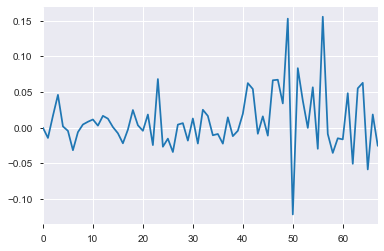

In [60]:
df_top['SBIN.NS'].plot()
#Here as u can see the positive peeks are more than negative for daily returns columns

In [ ]:
#Lets consider ['ALPSINDUS.NS'] ticker as an example for forecasting thus lets fetch only those parameters from API  

In [61]:
var = best_accounts_using_zscores[0]

In [62]:
var

'SBIN.NS'

In [66]:
for a,b in zip(df_test,test):
    if b==var:
        TS_data = a 

In [68]:
TS_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Lag,Daily Returns
count,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01,67.000000,67.000000
mean,283.205882,288.317647,276.128676,281.736031,281.736031,5.604434e+07,283.138807,0.009532
std,55.374995,53.478763,57.157617,55.529763,55.529763,2.997974e+07,54.721462,0.042800
min,178.000000,187.300003,173.550003,175.500000,175.500000,1.737932e+07,175.500000,-0.121488
25%,227.724995,231.774994,211.187504,221.312504,221.312504,3.458453e+07,232.675003,-0.014540
50%,313.750000,319.450012,310.100006,314.650009,314.650009,4.958639e+07,315.100006,0.002938
75%,323.625000,327.512490,318.599991,322.200012,322.200012,6.851041e+07,322.450012,0.022119
max,337.950012,339.850006,333.350006,339.299988,339.299988,1.557013e+08,339.299988,0.155562


In [69]:
TS_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 9 columns):
Date             68 non-null object
Open             68 non-null float64
High             68 non-null float64
Low              68 non-null float64
Close            68 non-null float64
Adj Close        68 non-null float64
Volume           68 non-null int64
Daily_Lag        67 non-null float64
Daily Returns    67 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.9+ KB


## Now we have data from 1st jan to 9th april of SBI bank which was one of the three list banks with less risk to invest

### Time Series is a big component of our everyday lives. They are in fact used in medicine (EEG analysis), finance (Stock Prices) and electronics (Sensor Data Analysis). Many Machine Learning models have been created in order to tackle these types of tasks, two examples are ARIMA (AutoRegressive Integrated Moving Average) models and RNNs (Recurrent Neural Networks).

### Hence now as we 8 accounts in our list we could forecast them using Machine Learning algorithm like (ARIMA or SARIMA) and predict the future value also I'm looking for a hypothesis to forecast those value using LSTM which are Recurrent Neural Networks which could predict better than ARIMA. Also doing Natural language processing on news paper data after web scraping it using selinium and having sentiment analysis over every news and merging it with there respect tickers will always be a upper hand 

In [70]:
#Creating custom error function for SMAPE (we can also load from sci-kit learn library)

# SAMPE = 100%n(Emission(|Ft - At|/(|At| + |Ft|)/2) where t=1 to n   

In [71]:


def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +np.abs(y_true))))

In [111]:
TS_data.index = TS_data['Date']

In [112]:
TS_data.drop(['Date'],1,inplace=True)

In [115]:
df = TS_data[['Open']].round()

In [162]:
df.index = pd.to_datetime(df.index)

In [163]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]


In [166]:
#Splitting the data in 70:30 ratio 

train_data.shape

(47, 1)

In [167]:
test_data.shape

(21, 1)

In [168]:
## I decided to set in this case p=5, d=1 and q=0 as the ARIMA parameters.

In [169]:
from sklearn.metrics import mean_squared_error

In [170]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

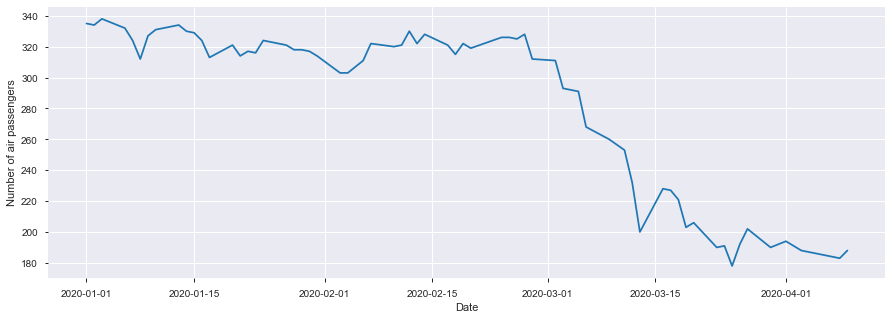

In [193]:
plt.xlabel('Date')
plt.ylabel('No. of Open values')
plt.plot(df)
plt.rcParams["figure.figsize"] = (15,30)
plt.show()


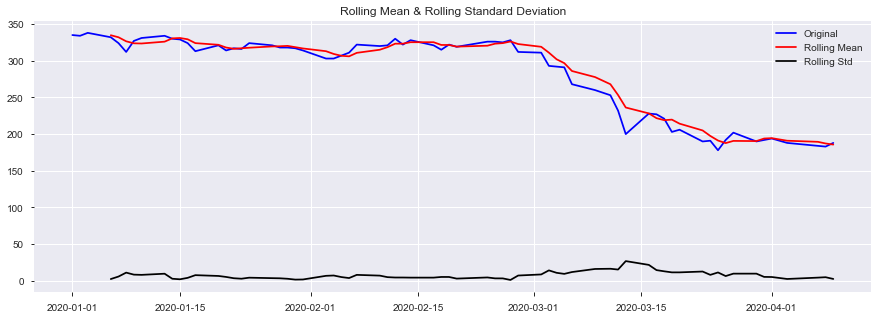

In [286]:
rolling_mean = df.rolling(window = 4).mean()
rolling_std = df.rolling(window = 4).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

In [173]:

#the other way to find out is dicky-fuller method

In [174]:
result = adfuller(df['Open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.05458000670234078
p-value: 0.9628197046603403
Critical Values:
	1%: -3.5319549603840894
	5%: -2.905755128523123
	10%: -2.5903569458676765


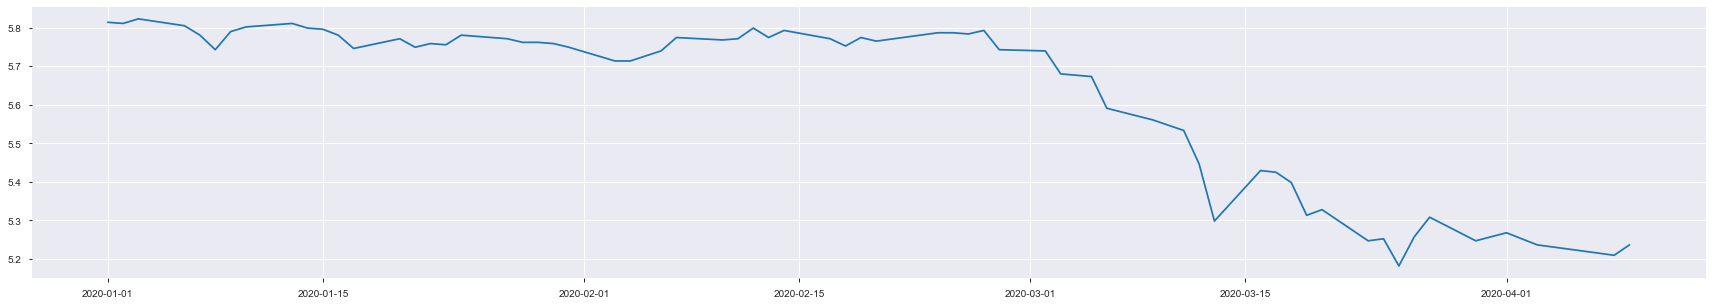

In [175]:
#Taking log of open values
df_log = np.log(df)
plt.plot(df_log)

In [176]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=4).mean()
    rolling_std = timeseries.rolling(window=4).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Open'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

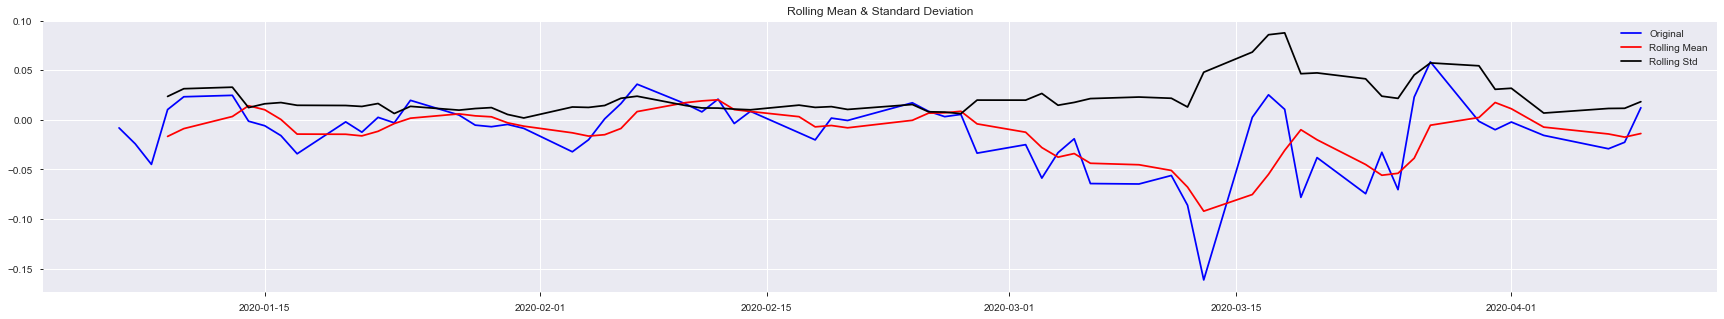

ADF Statistic: -4.713396768732138
p-value: 7.940924417404688e-05
Critical Values:
	1%: -3.53692771987915
	5%: -2.907887369384766
	10%: -2.591493291015625


In [177]:
rolling_mean = df_log.rolling(window=4).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

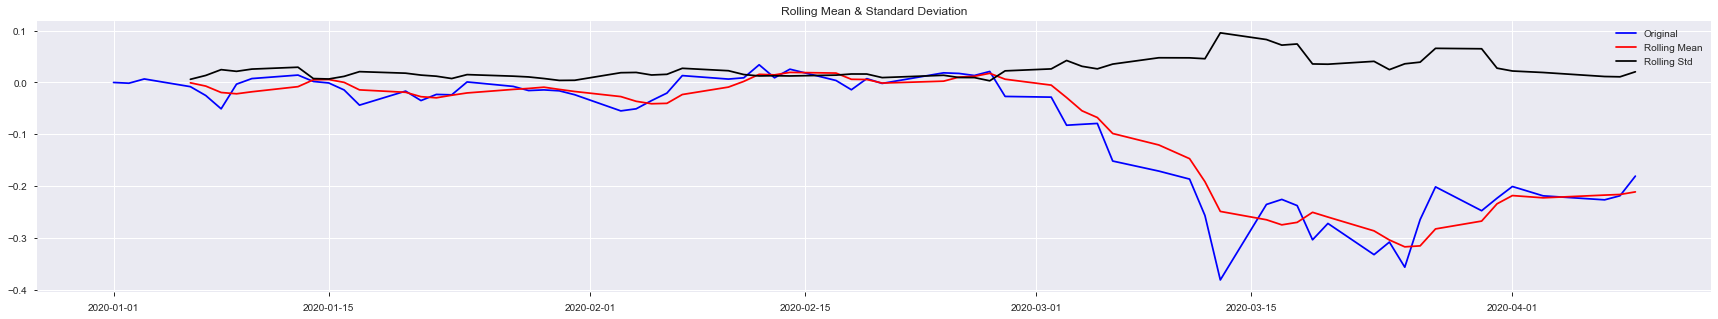

ADF Statistic: -1.3090085330986674
p-value: 0.625040887087197
Critical Values:
	1%: -3.5319549603840894
	5%: -2.905755128523123
	10%: -2.5903569458676765


In [178]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

In [179]:
#Exponential decay performed worse than subtracting the rolling mean. However, it is still more stationary than the original.

In [180]:
#Let’s try one more method to determine whether an even better solution exists.
#When applying time shifting, we subtract every the point by the one that preceded it.

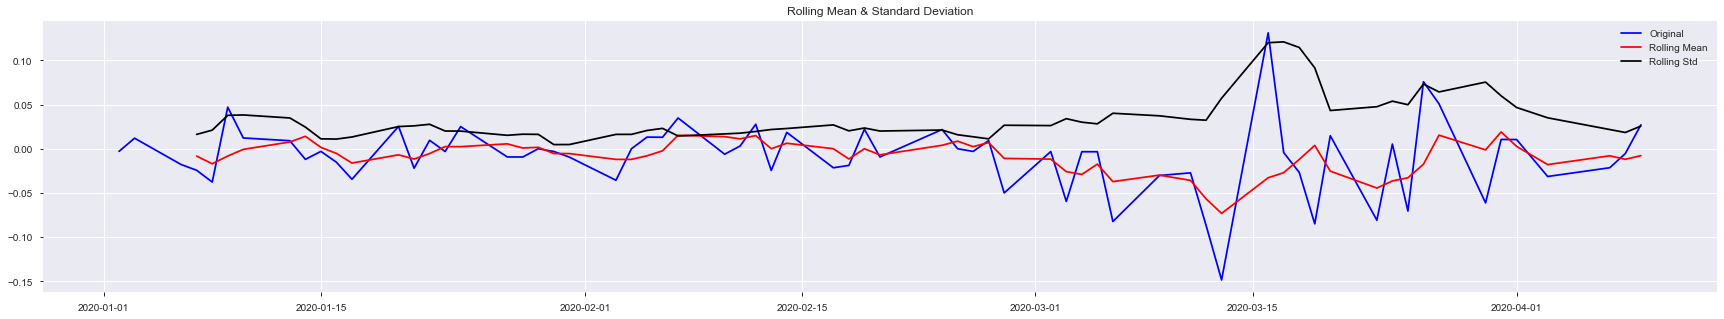

ADF Statistic: -9.145895020708851
p-value: 2.7686979841385116e-15
Critical Values:
	1%: -3.5335601309235605
	5%: -2.9064436883991434
	10%: -2.590723948576676


In [181]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [182]:
df_log.index = pd.to_datetime(df_log.index)

In [184]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [189]:
decomposition = seasonal_decompose(df_log.Open.values, freq=20)


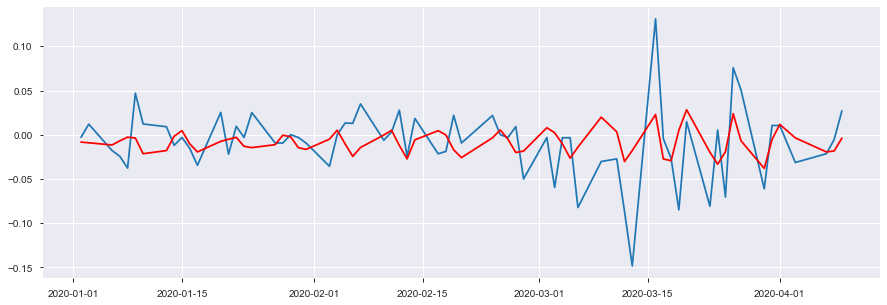

In [195]:
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.rcParams["figure.figsize"] = (1,5)
plt.plot(results.fittedvalues, color='red')


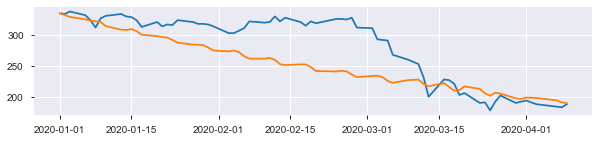

In [258]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['Open'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.rcParams["figure.figsize"] = (10,2)
plt.show()

In [301]:
from sklearn import metrics

In [ ]:
#Root mean square error

In [304]:
print(np.sqrt(metrics.mean_squared_error(df['Open'],predictions_ARIMA)))

42.5932903257373


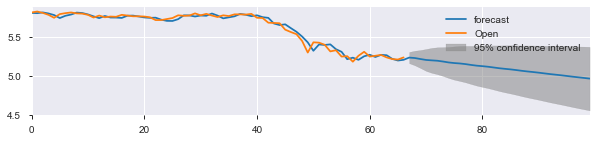

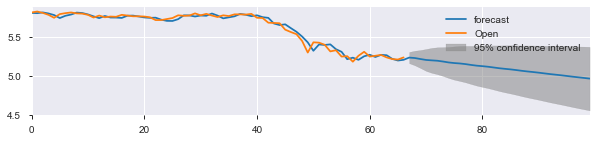

In [261]:
results.plot_predict(1,100)

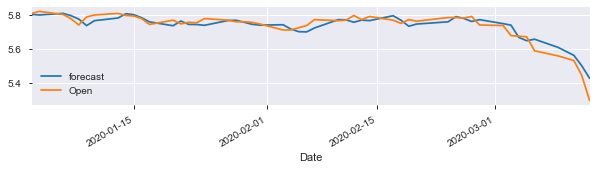

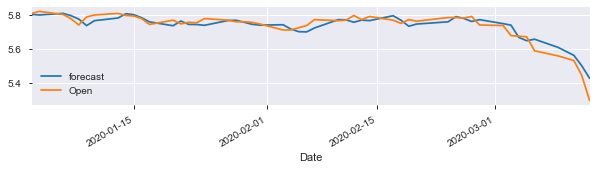

In [264]:
results.plot_predict(1,50)

In [ ]:
#Hence after doing model evalution we could see the prediction trend is very much exact the real trend and thus our model fitted well 